In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from PIL import Image
import torch.optim as optim
import matplotlib.pyplot as plt

['left', 'right', 'straight', 'up']
torch.Size([3, 30, 32])


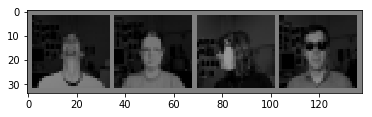

   up straight right straight


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = torchvision.datasets.ImageFolder(root = './faces_4_pose',
                                           transform=transform)
trainset, testset = train_test_split(dataset, test_size = 0.2)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = dataset.classes
print(classes)
print(dataset[0][0].size())

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=4, bias=True)
)
epoch: 5 loss: 1.710
epoch: 5 acc_train: 55.311%
epoch: 5 acc_test: 59.200%
epoch: 10 loss: 1.036
epoch: 10 acc_train: 69.339%
epoch: 10 acc_test: 71.200%
epoch: 15 loss: 0.587
epoch: 15 acc_train: 87.976%
epoch: 15 acc_test: 84.800%
epoch: 20 loss: 0.324
epoch: 20 acc_train: 92.184%
epoch: 20 acc_test: 89.600%
epoch: 25 loss: 0.206
epoch: 25 acc_train: 97.395%
epoch: 25 acc_test: 96.800%
epoch: 30 loss: 0.112
epoch: 30 acc_train: 98.998%
epoch: 30 acc_test: 97.600%
epoch: 35 loss: 0.057
epoch: 35 acc_train: 99.399%
epoch: 35 acc_test: 98.400%
epoch: 40 loss: 0.027
epoch: 40 acc_train: 99.800%
epoch:

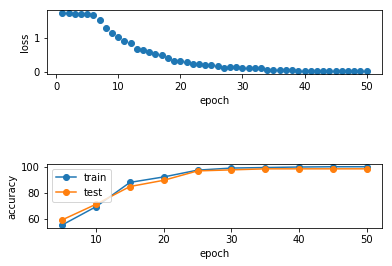

In [13]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=9e-4, momentum=0.9)

train_epoch = []
train_loss = []
acc_epoch = []
train_acc = []
test_acc = []

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # print(inputs)
        # print(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # print(loss)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
            
    train_epoch.append(epoch+1)
    train_loss.append(running_loss/100)
    if epoch % 5 == 4:    # print every 5 epochs
        print('epoch: %d loss: %.3f'%(epoch+1,running_loss/100))
        
        correct = 0
        total = 0
        with torch.no_grad():
            for data in trainloader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        acc_epoch.append(epoch+1)
        train_acc.append(100 * correct / total)
        print('epoch: %d acc_train: %.3f%%'%(epoch+1,100 * correct / total))
    
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_acc.append(100 * correct / total)
        print('epoch: %d acc_test: %.3f%%'%(epoch+1,100 * correct / total))

print('Finished Training\n')

plt.subplot(3, 1, 1)
plt.plot(train_epoch, train_loss, 'o')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(3, 1, 3)
plt.plot(acc_epoch, train_acc, '-o')
plt.plot(acc_epoch, test_acc, '-o')
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('./pose_recognition.png')
plt.show()

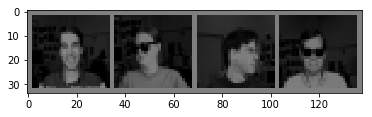

GroundTruth:  straight right  left straight
Predicted:  straight right  left straight


In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 98 %
